In [25]:
#libraries that we need
from google.cloud import bigquery

project_id = "data-analytics-470819"
client = bigquery.Client(project=project_id, location='US')



In [26]:
# !pip3 install pandas/
# !pip install google-cloud-bigquery
import pandas as pd   # type: ignore
print(pd.__version__)

2.1.4


In [27]:
dataset_ref = client.dataset('employee_data', project=project_id)
dataset = client.get_dataset(dataset_ref)
table_ref = dataset.table('tbl_hr_data')
table = client.get_table(table_ref)
table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

In [28]:
new_table_ref = dataset.table('tbl_new_employees')
new_table = client.get_table(new_table_ref)
new_table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

In [29]:
df = client.list_rows(table=table).to_dataframe()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.38,0.53,2,157,3,0,1,0,sales,low,EMP00001
1,0.80,0.86,5,262,6,0,1,0,sales,medium,EMP00002
2,0.11,0.88,7,272,4,0,1,0,sales,medium,EMP00003
3,0.72,0.87,5,223,5,0,1,0,sales,low,EMP00004
4,0.37,0.52,2,159,3,0,1,0,sales,low,EMP00005


In [30]:
df2 = client.list_rows(table=new_table).to_dataframe()
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.537849,0.122914,2,208,2,0,0,0,IT,high,NE15043
1,0.056211,0.322600,2,229,5,1,0,0,IT,low,NE15086
2,0.555186,0.555949,2,187,3,0,0,0,RandD,medium,NE15035
3,0.605273,0.713086,2,218,3,0,0,0,RandD,high,NE15069
4,0.043437,0.162372,2,175,3,0,0,0,RandD,high,NE15082


In [31]:
# !sudo apt-get update -y
# !sudo apt-get install python3.9 python3.9-distutils -y
# !sudo update-alternatives --install /usr/bin/python python /usr/bin/python3.9 1
# !sudo update-alternatives --install /usr/bin/python python /usr/bin/python3.12 2
# !sudo update-alternatives --config python
# !python --version
# !sudo apt-get update -y
# !sudo apt-get install python3.9 python3.9-distutils -y
# !wget https://bootstrap.pypa.io/get-pip.py
# !python3.9 get-pip.py
# !python3.9 -m pip install ipykernel
!python --version



Python 3.9.6


In [32]:
from pycaret.classification import *


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         14999 non-null  Int64  
 3   average_montly_hours   15004 non-null  Int64  
 4   time_spend_company     14999 non-null  Int64  
 5   Work_accident          15000 non-null  Int64  
 6   Quit_the_Company       15004 non-null  Int64  
 7   promotion_last_5years  15004 non-null  Int64  
 8   Departments            15004 non-null  object 
 9   salary                 15004 non-null  object 
 10  employee_id            15004 non-null  object 
dtypes: Int64(6), float64(2), object(3)
memory usage: 1.3+ MB


In [34]:
setup(df, 
      target='Quit_the_Company',
      session_id=123,
      ignore_features=['employee_id'],
      categorical_features=['salary', 'Departments'])

,Description,Value
0,Session id,123
1,Target,Quit_the_Company
2,Target type,Binary
3,Original data shape,"(15004, 11)"
4,Transformed data shape,"(15004, 21)"
5,Transformed train set shape,"(10502, 21)"
6,Transformed test set shape,"(4502, 21)"
7,Ignore features,1
8,Numeric features,7
9,Categorical features,2


In [35]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9878,0.9910,0.9581,0.9905,0.9740,0.9660,0.9663,0.2370
lightgbm,Light Gradient Boosting Machine,0.9853,0.9932,0.9505,0.9876,0.9686,0.9591,0.9594,0.5050
et,Extra Trees Classifier,0.9841,0.9910,0.9509,0.9820,0.9660,0.9557,0.9560,0.2280
gbc,Gradient Boosting Classifier,0.9765,0.9891,0.9313,0.9689,0.9496,0.9343,0.9347,0.3440
dt,Decision Tree Classifier,0.9746,0.9697,0.9605,0.9351,0.9475,0.9307,0.9310,0.0540
ada,Ada Boost Classifier,0.9584,0.9830,0.9085,0.9167,0.9123,0.8851,0.8853,0.1590
knn,K Neighbors Classifier,0.9343,0.9687,0.9205,0.8246,0.8698,0.8260,0.8284,0.1360
qda,Quadratic Discriminant Analysis,0.8473,0.9289,0.8530,0.6398,0.7289,0.6264,0.6408,0.0400
lr,Logistic Regression,0.7934,0.8178,0.3592,0.6134,0.4523,0.3359,0.3544,1.2660
lda,Linear Discriminant Analysis,0.7838,0.8141,0.3428,0.5787,0.4296,0.3071,0.3236,0.0710


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [36]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9838,0.9859,0.9402,0.9916,0.9652,0.9547,0.9553
1,0.9819,0.9941,0.9442,0.9793,0.9615,0.9497,0.9499
2,0.9924,0.9958,0.9760,0.9919,0.9839,0.9789,0.9789
3,0.9876,0.9871,0.9600,0.9877,0.9736,0.9655,0.9657
4,0.9848,0.9930,0.9400,0.9958,0.9671,0.9572,0.9578
5,0.9924,0.9930,0.9680,1.0000,0.9837,0.9788,0.9790
6,0.9876,0.9896,0.9640,0.9837,0.9737,0.9656,0.9657
7,0.9924,0.9908,0.9720,0.9959,0.9838,0.9788,0.9789
8,0.9886,0.9891,0.9640,0.9877,0.9757,0.9682,0.9684


In [37]:
final_df = predict_model(rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9904,0.9929,0.9683,0.9914,0.9797,0.9735,0.9736


In [38]:
final_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,Quit_the_Company,prediction_label,prediction_score
1679,0.43,0.55,2,159,3,0,0,RandD,low,1,1,0.97
4665,0.63,0.93,3,236,4,0,0,sales,high,0,0,1.00
1076,0.09,0.79,6,276,4,0,0,sales,medium,1,1,1.00
1253,0.85,1.00,4,234,5,0,0,hr,low,1,1,0.99
2570,0.80,0.96,3,257,5,0,0,support,medium,0,0,0.73


In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4502 entries, 1679 to 14934
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     4502 non-null   float32 
 1   last_evaluation        4502 non-null   float32 
 2   number_project         4500 non-null   Int64   
 3   average_montly_hours   4502 non-null   Int64   
 4   time_spend_company     4500 non-null   Int64   
 5   Work_accident          4501 non-null   Int64   
 6   promotion_last_5years  4502 non-null   Int64   
 7   Departments            4502 non-null   category
 8   salary                 4502 non-null   category
 9   Quit_the_Company       4502 non-null   Int64   
 10  prediction_label       4502 non-null   int64   
 11  prediction_score       4502 non-null   float64 
dtypes: Int64(6), category(2), float32(2), float64(1), int64(1)
memory usage: 387.4 KB


In [40]:
new_predictions = predict_model(rf_model, data = df2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9200,0,0.0000,0.0000,0.0000,0.0000,0.0000


In [41]:
new_predictions.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,employee_id,Quit_the_Company,prediction_label,prediction_score
0,0.537849,0.122914,2,208,2,0,0,IT,high,NE15043,0,0,1.00
1,0.056211,0.322600,2,229,5,1,0,IT,low,NE15086,0,0,0.65
2,0.555186,0.555949,2,187,3,0,0,RandD,medium,NE15035,0,0,0.96
3,0.605273,0.713086,2,218,3,0,0,RandD,high,NE15069,0,0,1.00
4,0.043437,0.162372,2,175,3,0,0,RandD,high,NE15082,0,0,0.69


In [48]:
new_predictions.to_gbq('employee_data.pilot_predictions',
                       project_id,
                       chunksize=None,
                       if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 10010.27it/s]


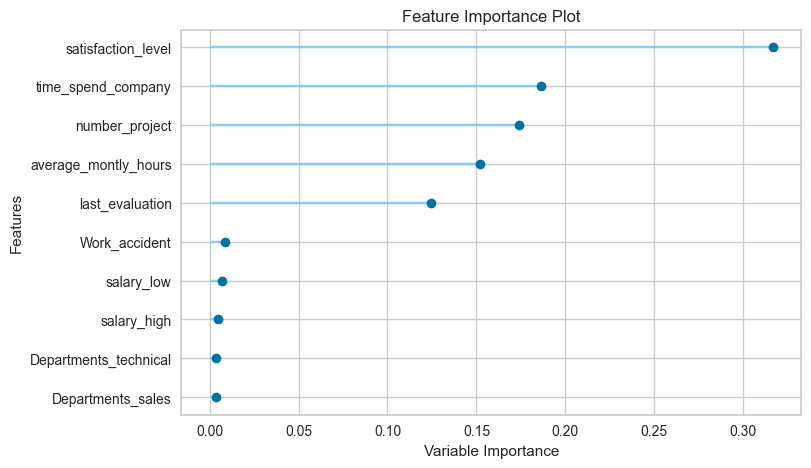

In [49]:
plot_model(rf_model, plot='feature')

In [50]:
rf_model.feature_names_in_

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments_management',
       'Departments_product_mng', 'Departments_sales', 'Departments_IT',
       'Departments_technical', 'Departments_RandD',
       'Departments_support', 'Departments_hr', 'Departments_marketing',
       'Departments_accounting', 'salary_medium', 'salary_low',
       'salary_high'], dtype=object)

In [51]:
rf_model.feature_importances_

array([0.31688197, 0.12442897, 0.17369722, 0.15196731, 0.18618142,
       0.00877203, 0.00168791, 0.00158206, 0.00117902, 0.00365284,
       0.00174142, 0.00382877, 0.00157628, 0.00294408, 0.00181996,
       0.00129636, 0.00161175, 0.00360871, 0.00688951, 0.00465242])

In [52]:
feature_table = pd.DataFrame(zip(rf_model.feature_names_in_, rf_model.feature_importances_),
                             columns=['feature', 'importance'])
feature_table

,feature,importance
0,satisfaction_level,0.316882
1,last_evaluation,0.124429
2,number_project,0.173697
3,average_montly_hours,0.151967
4,time_spend_company,0.186181
5,Work_accident,0.008772
6,promotion_last_5years,0.001688
7,Departments_management,0.001582
8,Departments_product_mng,0.001179
9,Departments_sales,0.003653


In [53]:
feature_table.to_gbq('employee_data.feature_table',
                     project_id,
                     chunksize=None,
                     if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 5370.43it/s]
